In [1]:
#依赖三个库，如果没安装，可以使用 pip install 命令安装
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [12]:
#希腊值
def func_alfa(u,St,K,r,dt,k,sita,Vt,sigma1,cov,sigma2,tao):
    d1=(np.log(St/K)+(r+0.5*np.square(sigma2)*tao))/sigma2*np.sqrt(tao)
    d2=(np.log(St/K)+(r-0.5*np.square(sigma2)*tao))/sigma2*np.sqrt(tao)
    alfa=[0,0,0]
    alfa[0]=stats.norm.pdf(d1,0,1)/(St*sigma2*np.sqrt(tao))
    alfa[1]=stats.norm.pdf(d1,0,1)*(2*r*tao-d2*sigma2*np.sqrt(tao))/2*tao*sigma2*np.sqrt(tao)
    alfa[2]=stats.norm.pdf(d1,0,1)*(1+d1/(sigma2*np.sqrt(tao)))/(np.square(St)*sigma2*np.sqrt(tao))
    return alfa
#标的价格
def func_S(u,St,K,r,dt,k,sita,Vt,sigma1,cov,sigma2,tao,alfa,rho):
    epsilon_S=np.random.normal()
    alfa_s=alfa[0]
    alfa_t=alfa[1]
    alfa_ss=alfa[2]
    u_bar=(u+rho*(alfa_t+(Vt*np.square(St)*alfa_ss)/(2*np.square(1-rho*St*alfa_s))))/(1-rho*St*alfa_s)
    log_St_dt=np.log(St)+(u_bar-(Vt/2*np.square(1-rho*St*alfa_s)))*dt+np.sqrt(Vt)*epsilon_S*np.sqrt(dt)/(1-rho*St*alfa_s)
    St=np.exp(log_St_dt)
    return St
#随机波动率
def func_V(u,St,K,r,dt,k,sita,Vt,sigma1,cov,sigma2,tao):
    epsilon_Vbar=np.random.normal()
    epsilon_S=np.random.normal()
    epsilon_V=cov*epsilon_S+np.sqrt(1-np.square(cov)*epsilon_Vbar)
    log_Vt_dt=np.log(Vt)+(k*(sita-Vt)/Vt-0.5*np.square(sigma1)/Vt)*dt+sigma1*np.power(Vt,-0.5)*epsilon_V*np.sqrt(dt)
    Vt=np.exp(log_Vt_dt)
    return Vt

In [13]:
#初始值
u=0.05
S0=100
K=100
r=0.03
dt=1/250
k=1
sita=0.01
V0=0.1 
sigma1=0.25
cov=-0.1
sigma2=0.15

value={} #使用字典变量存入数据

for tao in (0.1,1):
    for rho in (-0.1,-0.05,0,0.05,0.1):
        St_v=[]
        Vt_v=[]
        Time=[]
        t=0
        alfa_sv=[]
        value2={}
        #按时间序列迭代
        for i in range(0,int(tao/dt)):
            #print('i: '+str(i))
            if i==0:
                St=S0
                Vt=V0
            else : 
                St=func_S(u,St,K,r,dt,k,sita,Vt,sigma1,cov,sigma2,tao,alfa,rho)
                Vt=func_V(u,St,K,r,dt,k,sita,Vt,sigma1,cov,sigma2,tao)

            alfa=func_alfa(u,St,K,r,dt,k,sita,Vt,sigma1,cov,sigma2,tao)
            
            Time.append(t)
            St_v.append(St)
            Vt_v.append(Vt)
            alfa_sv.append(alfa[0])
            t+=dt
        value2['St']=St_v
        value2['Vt']=Vt_v
        value2['Time']=Time
        value2['alfa_s']=alfa_sv
        value[str(tao)+'tao-rho'+str(rho)]=value2

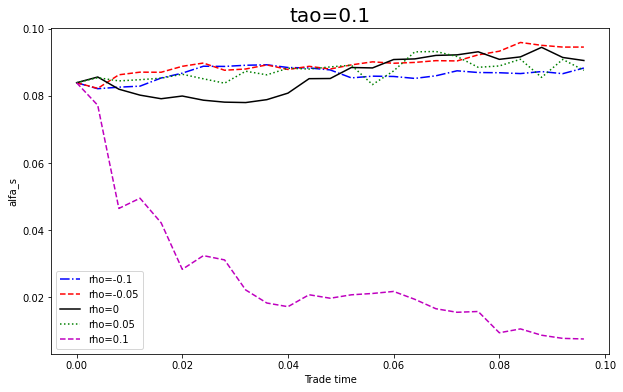

In [14]:
#tao=0.1条件下的希腊值绘图
t=value['0.1tao-rho-0.1']['Time']
x1=value['0.1tao-rho-0.1']['alfa_s']
x2=value['0.1tao-rho-0.05']['alfa_s']
x3=value['0.1tao-rho0']['alfa_s']
x4=value['0.1tao-rho0.05']['alfa_s']
x5=value['0.1tao-rho0.1']['alfa_s']
plt.figure(figsize=(10,6))
plt.plot(t,x1,'b-.',label='rho=-0.1')
plt.plot(t,x2,'r--',label='rho=-0.05')
plt.plot(t,x3,'k-',label='rho=0')
plt.plot(t,x4,'g:',label='rho=0.05')
plt.plot(t,x5,'m--',label='rho=0.1')
plt.ylabel('alfa_s')
plt.xlabel('Trade time')
plt.legend(loc='best')
plt.title('tao=0.1',size=20)
plt.savefig('./alfa_s01.jpg')
plt.show()

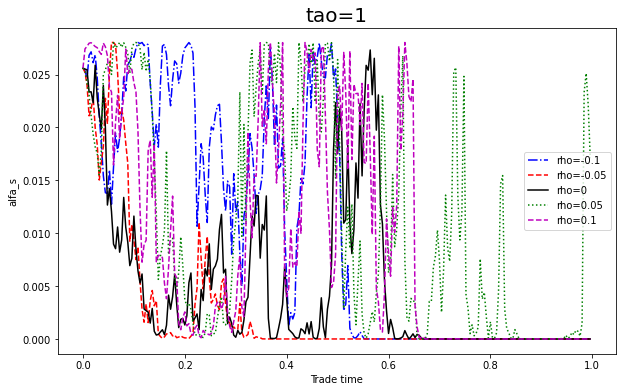

In [15]:
#tao=1条件下的希腊值绘图
t=value['1tao-rho-0.1']['Time']
x1=value['1tao-rho-0.1']['alfa_s']
x2=value['1tao-rho-0.05']['alfa_s']
x3=value['1tao-rho0']['alfa_s']
x4=value['1tao-rho0.05']['alfa_s']
x5=value['1tao-rho0.1']['alfa_s']
plt.figure(figsize=(10,6))
plt.plot(t,x1,'b-.',label='rho=-0.1')
plt.plot(t,x2,'r--',label='rho=-0.05')
plt.plot(t,x3,'k-',label='rho=0')
plt.plot(t,x4,'g:',label='rho=0.05')
plt.plot(t,x5,'m--',label='rho=0.1')
plt.ylabel('alfa_s')
plt.xlabel('Trade time')
plt.legend(loc='best')
plt.title('tao=1',size=20)
plt.savefig('./alfa_s1.jpg')

In [6]:
#初始值
r=0
S0=100
q=0
k2=1
sita2=0.01
V0=0.1
sigma=0.25
cov=-0.1
S_max=200
V_max=0.2
T_max=1
dS=20
dV=0.01
dt=1/250

#对S，V，C 栅格离散化
vetor_S=np.arange(S0, S_max+dS,dS)
vetor_S=np.append(vetor_S,S_max)
S=vetor_S
len_Si=len(vetor_S)
vetor_V=np.arange(V0, V_max,dV)
vetor_V=np.append(vetor_V,V_max)
len_Vj=len(vetor_V)
V=vetor_V
array_C= np.zeros((len_Si, len_Vj))    
Cn_1=array_C 

#生成时间序列（倒序）
times=np.arange(0,T_max+0.5,0.5)
times=times[::-1]


In [7]:
#期权定价函数的边界条件
def func_bonC(Si,Vj):
    if t==T_max:
        C=abs(Si-K)
    elif Si==0:
        C=0
    elif Vj== np.inf:
        C=Si
    elif Si==np.inf:
        C=Si-K*np.exp(-r*tao)
    else:
        C='unsatisfy'
    #print(t,C)
    return C

#期权定价函数
def func_Ct(r,S,K,q,k2,sita2,V,sigma,cov,S_max,V_max,T_max,dS,dV,dt,roh,tao,Cn_1):

    Cn=Cn_1
    for i in range(1,len_Si-1):
        for j in range(1,len_Vj-1):
            #print('i:{}\nj:{}'.format(i,j))
            #Cn_1在t=n+1下的二维矩阵
            Vij=np.sqrt(V[j])*(1-rho*S[i]*(Cn_1[i+1,j]-2*Cn_1[i,j]+Cn_1[i-1,j])/np.square(dS))
            if func_bonC(Si=S[i],Vj=V[j])=='unsatisfy': 
                #期权定价函数
                Cn[i,j]=dt*Cn_1[i-1,j-1]*cov*sigma*np.sqrt(V[j])*Vij*S[i]/(4*dS*dV)+ \
                        dt*Cn_1[i-1,j]*(np.square(Vij*S[i]/dS)/2-r*S[i]/(2*dS))- \
                        dt*Cn_1[i-1,j+1]*cov*sigma*np.sqrt(V[j])*Vij*S[i]/(4*dS*dV)+ \
                        dt*Cn_1[i,j-1]*(V[j]*np.square(sigma/dV)/2-k2*(sita2-V[j])/(2*dV))- \
                        dt*Cn_1[i,j]*(np.square(Vij*S[i]/dS)/2+np.square(sigma/dV)*V[j]+r-1/dt)+ \
                        dt*Cn_1[i,j+1]*(V[j]*np.square(sigma/dV)/2+k2*(sita2-V[j])/(2*dV))- \
                        dt*Cn_1[i+1,j-1]*cov*sigma*np.sqrt(V[j])*Vij*S[i]/(4*dS*dV)+ \
                        dt*Cn_1[i+1,j]*(np.square(Vij*S[i]/dS)/2+r*S[i]/(2*dS))+ \
                        dt*Cn_1[i+1,j+1]*cov*sigma*np.sqrt(V[j])*Vij*S[i]/(4*dS*dV)
            else :
                Cn[i,j]=func_bonC(Si=S[i],Vj=V[j])
    return Cn

In [8]:
value={} #使用字典变量储存t=0（当前时刻）的期权价格

#从t=T_max 开始迭代计算期权价格C
for t in times:
    for tao in (0.1,1):
        for K in range(80,120,5):
            for rho in (-0.05,0,0.05):
                Cn_1=func_Ct(r,S,K,q,k2,sita2,V,sigma,cov,S_max,V_max,T_max,dS,dV,dt,rho,tao,Cn_1)
                if t==0:
                    value['tao={},K={},rho={}'.format(tao,K,rho)]=Cn_1             

In [10]:
value.keys() #tao,K,rho的组合情况

dict_keys(['tao=0.1,K=80,rho=-0.05', 'tao=0.1,K=80,rho=0', 'tao=0.1,K=80,rho=0.05', 'tao=0.1,K=85,rho=-0.05', 'tao=0.1,K=85,rho=0', 'tao=0.1,K=85,rho=0.05', 'tao=0.1,K=90,rho=-0.05', 'tao=0.1,K=90,rho=0', 'tao=0.1,K=90,rho=0.05', 'tao=0.1,K=95,rho=-0.05', 'tao=0.1,K=95,rho=0', 'tao=0.1,K=95,rho=0.05', 'tao=0.1,K=100,rho=-0.05', 'tao=0.1,K=100,rho=0', 'tao=0.1,K=100,rho=0.05', 'tao=0.1,K=105,rho=-0.05', 'tao=0.1,K=105,rho=0', 'tao=0.1,K=105,rho=0.05', 'tao=0.1,K=110,rho=-0.05', 'tao=0.1,K=110,rho=0', 'tao=0.1,K=110,rho=0.05', 'tao=0.1,K=115,rho=-0.05', 'tao=0.1,K=115,rho=0', 'tao=0.1,K=115,rho=0.05', 'tao=1,K=80,rho=-0.05', 'tao=1,K=80,rho=0', 'tao=1,K=80,rho=0.05', 'tao=1,K=85,rho=-0.05', 'tao=1,K=85,rho=0', 'tao=1,K=85,rho=0.05', 'tao=1,K=90,rho=-0.05', 'tao=1,K=90,rho=0', 'tao=1,K=90,rho=0.05', 'tao=1,K=95,rho=-0.05', 'tao=1,K=95,rho=0', 'tao=1,K=95,rho=0.05', 'tao=1,K=100,rho=-0.05', 'tao=1,K=100,rho=0', 'tao=1,K=100,rho=0.05', 'tao=1,K=105,rho=-0.05', 'tao=1,K=105,rho=0', 'tao=1,K=

In [4]:
π=103

In [9]:
\Gamma


SyntaxError: unexpected character after line continuation character (<ipython-input-9-49e2ec053d10>, line 1)